   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

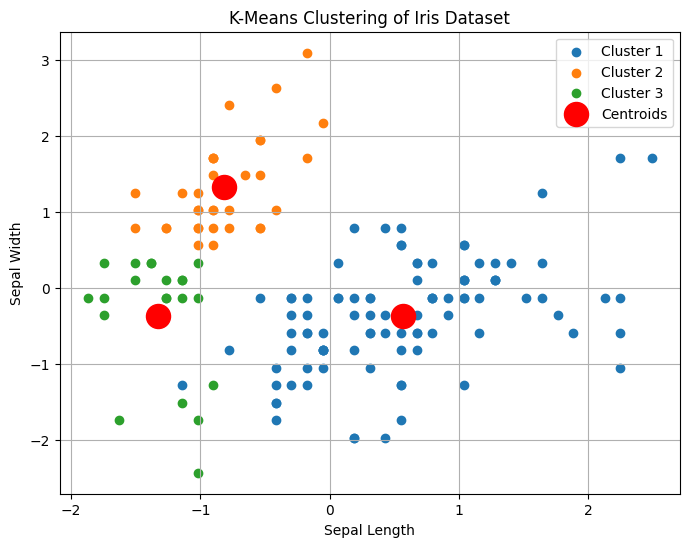

In [6]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Step 3: Data exploration
print(df.head())
print(df.describe())

# Step 4: Data preprocessing (standardization)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 5: Apply K-Means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['cluster'] = clusters

# Step 6: Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[clusters == 0, 0], df_scaled[clusters == 0, 1], label='Cluster 1')
plt.scatter(df_scaled[clusters == 1, 0], df_scaled[clusters == 1, 1], label='Cluster 2')
plt.scatter(df_scaled[clusters == 2, 0], df_scaled[clusters == 2, 1], label='Cluster 3')
#plt.scatter(df_scaled[clusters == 3, 0], df_scaled[clusters == 3, 1], label='Cluster 4')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering of Iris Dataset')
plt.legend()
plt.grid()
plt.show()
